## Knock airport Weather

Analysis of data from Knock airport weather station. Plotting temperature trends over time. And then plotting the wind speed trends.

Author: Carmine Giardino

In [45]:
import pandas as pd
# Read the data from the API endpoint
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# Read the csv data into a DataFrame
df = pd.read_csv(url, skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


## Part 1: Plot the temperature trends over time

In [46]:
# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [47]:
# Set the index to the date column
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def apply_common_plot_formatting(ax=None, legend_loc='upper left', rotation=90):
    """Apply common plot formatting: yearly x-ticks, legend, grid, tight layout."""
    if ax is None:
        ax = plt.gca()
    # Set major ticks to each year and format as year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=rotation)
    plt.xlim(df.index.min(), df.index.max())  # Limit x-axis to data range
    plt.xlabel('Year', labelpad=20)
    ax.legend(loc=legend_loc)
    ax.grid()
    plt.tight_layout()

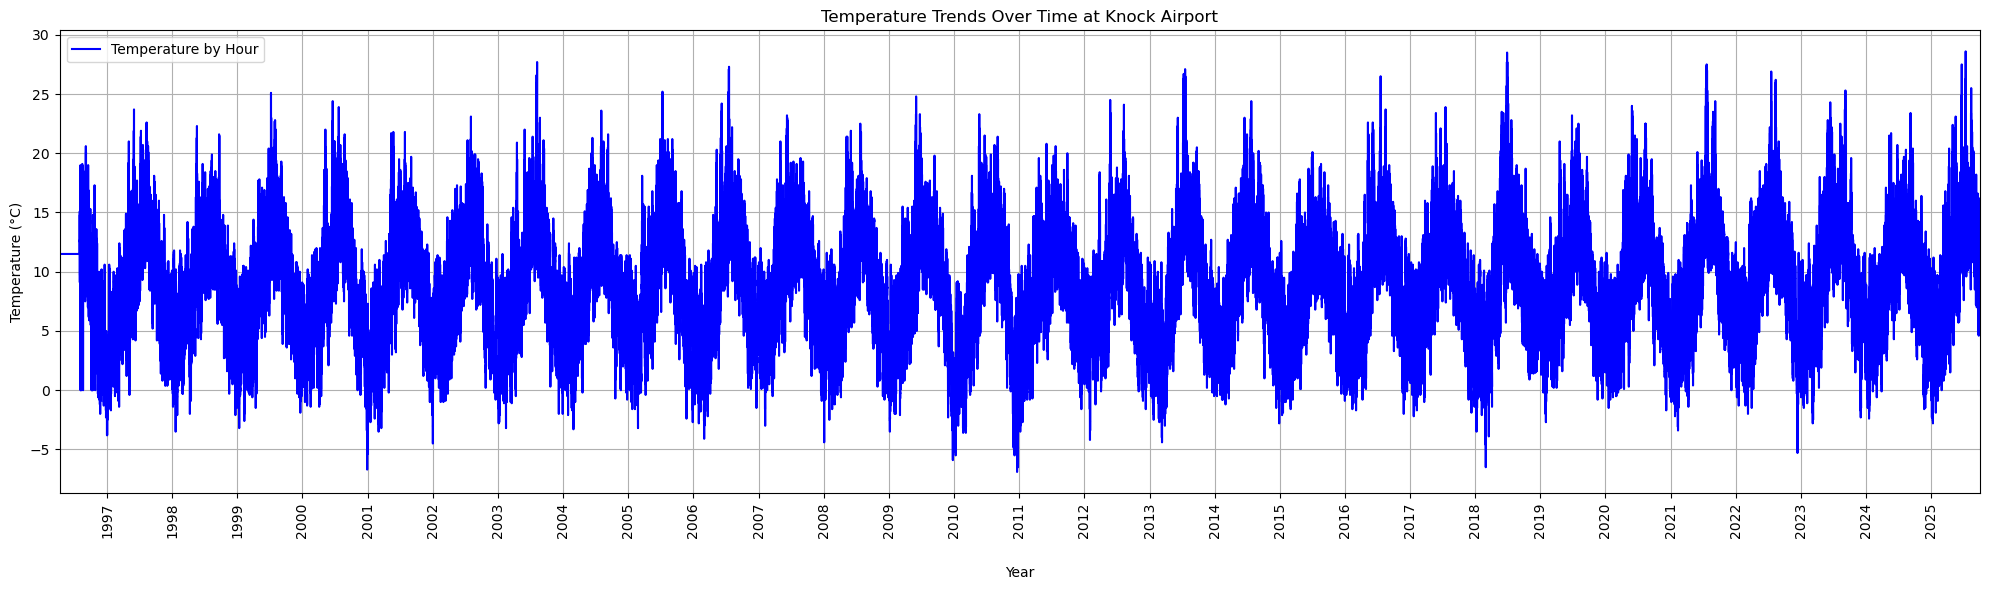

In [49]:
# Plot the temperature trends over time
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['temp'], color='blue', label='Temperature by Hour')
plt.title('Temperature Trends Over Time at Knock Airport')
plt.ylabel('Temperature (°C)')
apply_common_plot_formatting(plt.gca())

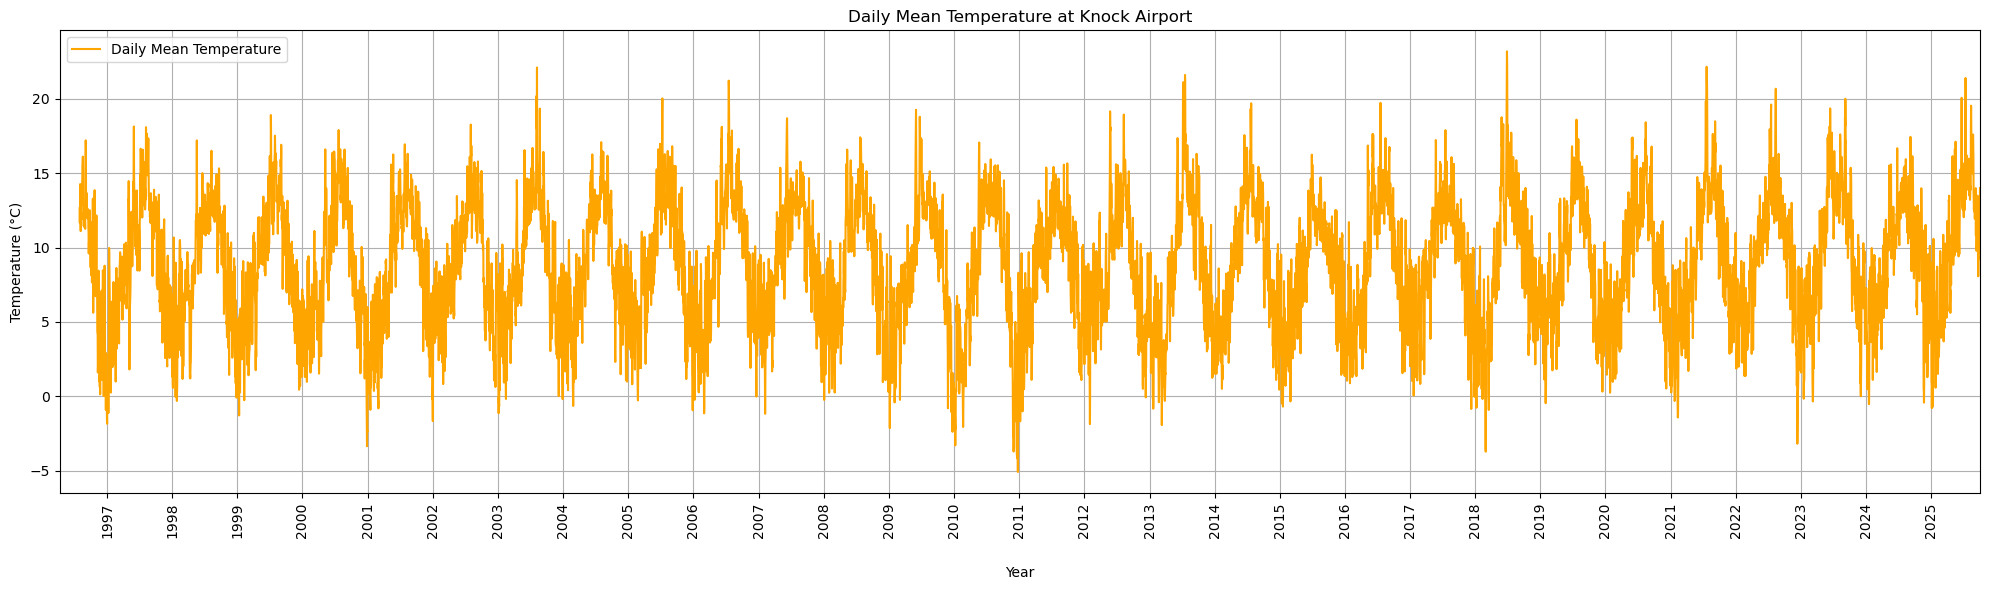

In [50]:
# Group by day and calculate the mean temperature
# ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
daily_temp = df.resample('D')['temp'].mean()
# Plot the mean temperature for each day
plt.figure(figsize=(20, 6))
plt.plot(daily_temp.index, daily_temp.values, color='orange', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature at Knock Airport')
plt.ylabel('Temperature (°C)')

# Set major ticks to each year and format as year
apply_common_plot_formatting(plt.gca())

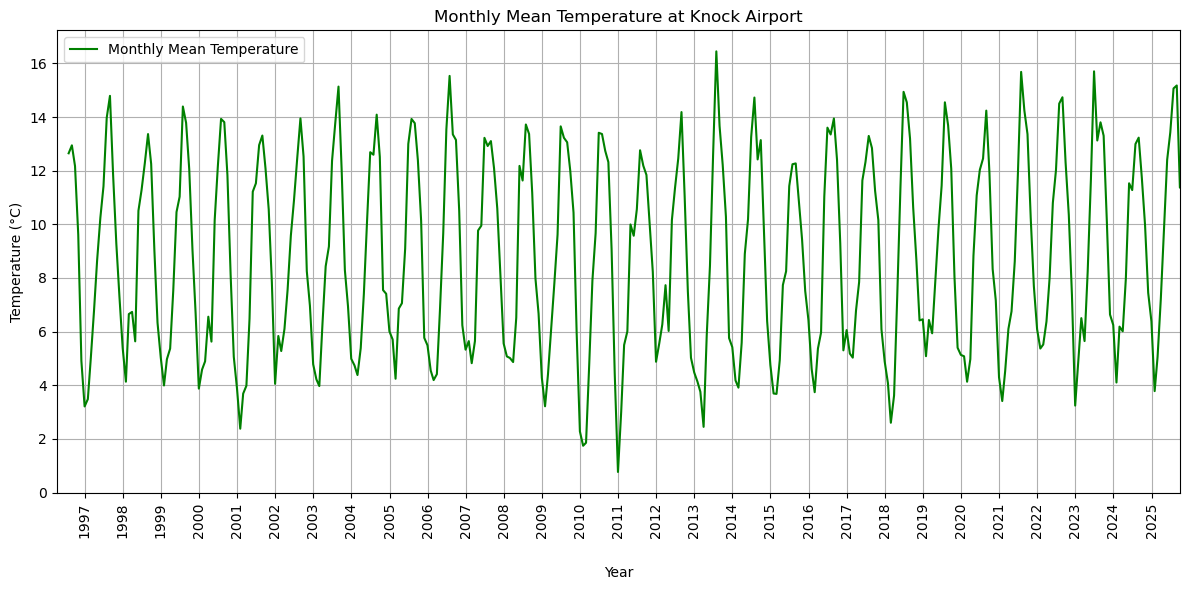

In [51]:
# Group by month and calculate the mean temperature
monthly_temp = df.resample('ME')['temp'].mean()

# Plot the mean temperature for each month
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp.index, monthly_temp.values, color='green', label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature at Knock Airport')
plt.ylabel('Temperature (°C)')

# Set major ticks to each year and format as year
apply_common_plot_formatting(plt.gca())

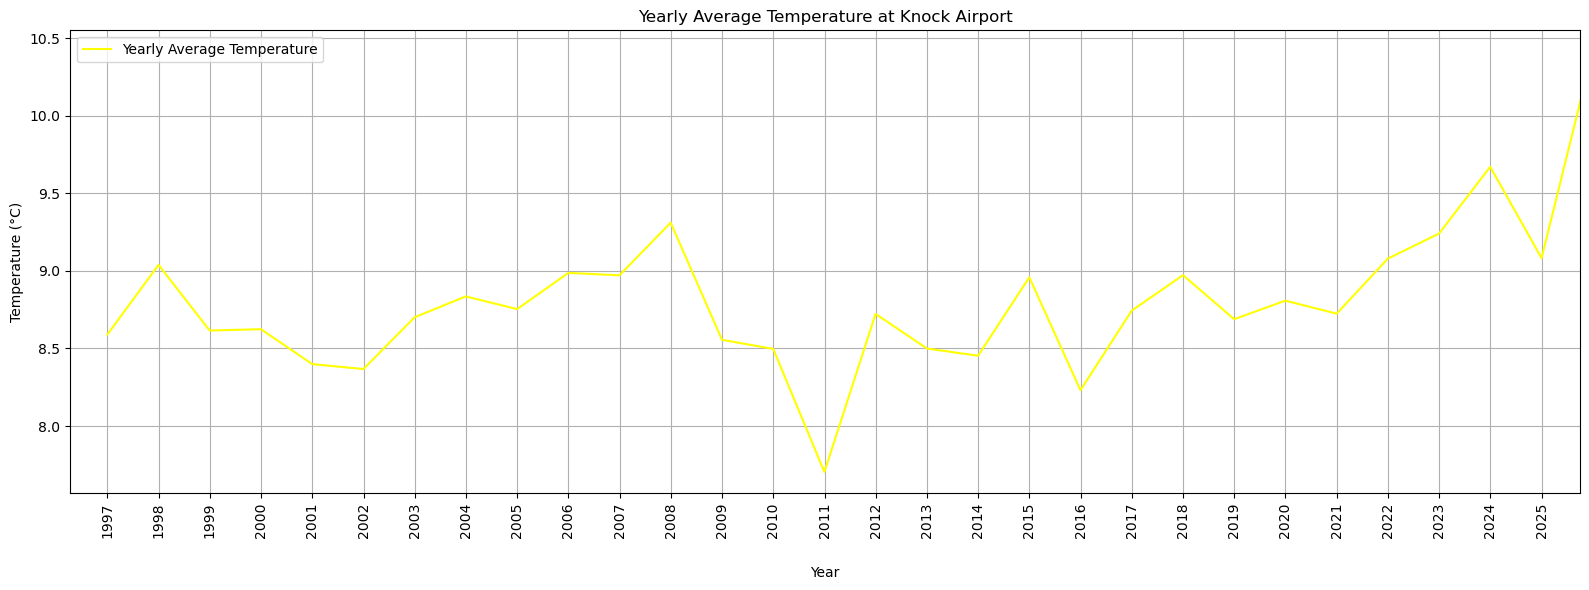

In [52]:
# Plotting the yearly average temperature
plt.figure(figsize=(16, 6))
# Calculate yearly average temperature
yearly_temp = df['temp'].resample('YE').mean()
plt.plot(yearly_temp.index,yearly_temp.values, color='yellow', label='Yearly Average Temperature')
plt.title('Yearly Average Temperature at Knock Airport')
plt.ylabel('Temperature (°C)')
apply_common_plot_formatting(plt.gca())

## Part 2: Plot the wind speed trends over time

In [53]:
# Clean data missing from the wind speed column
# Non-numeric strings or missing data are replaced with NaN (Not a Number) because of errors='coerce'
# When plotting any NaN values are skipped automatically by matplotlib
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0.0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0.0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0.0,0,0,80,81,0.0,8000,32,7


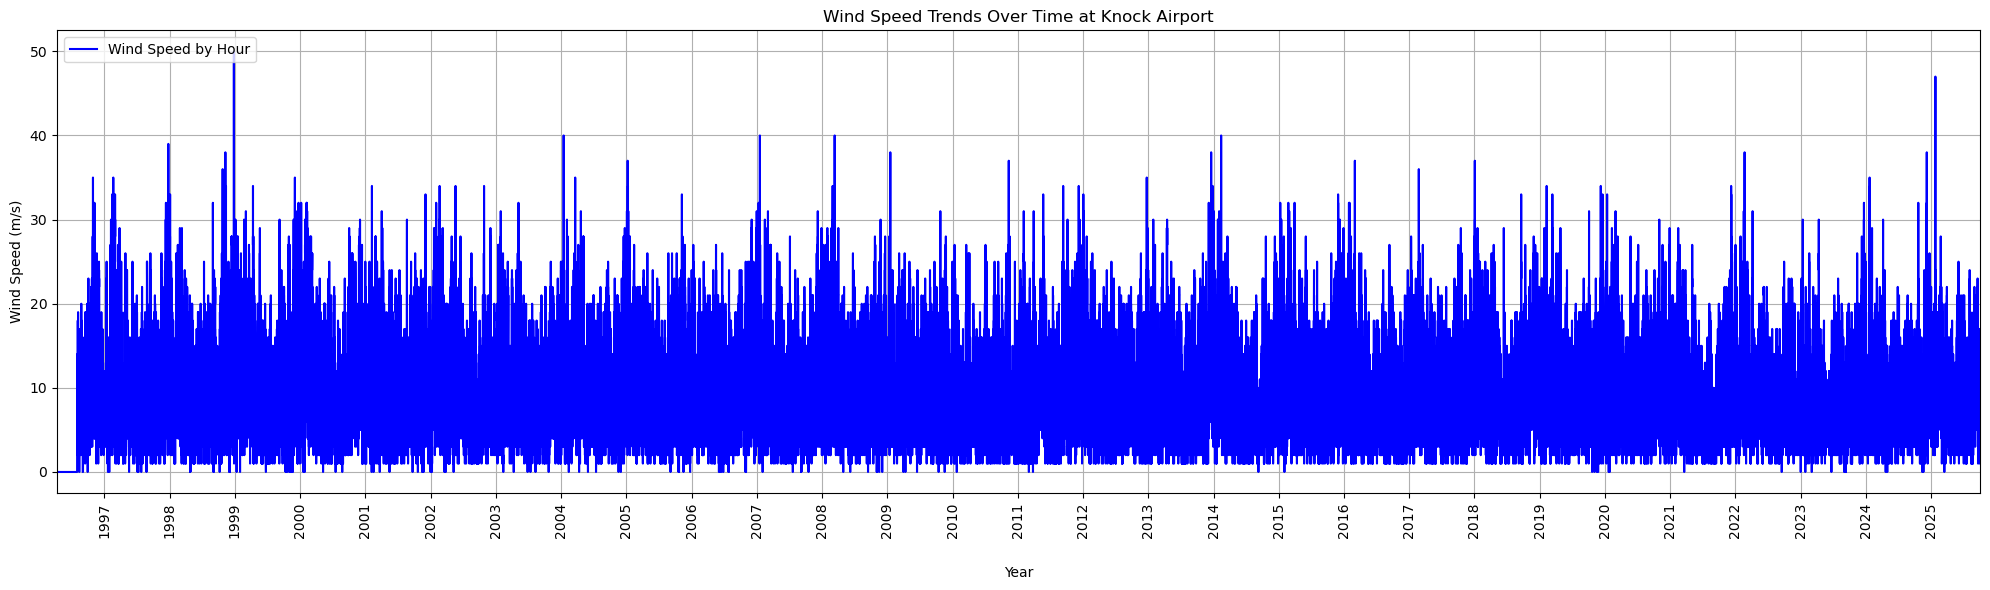

In [54]:
# Plot the wind speed trends over time
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['wdsp'], color='blue', label='Wind Speed by Hour')
plt.title('Wind Speed Trends Over Time at Knock Airport')
plt.ylabel('Wind Speed (m/s)')
apply_common_plot_formatting(plt.gca())

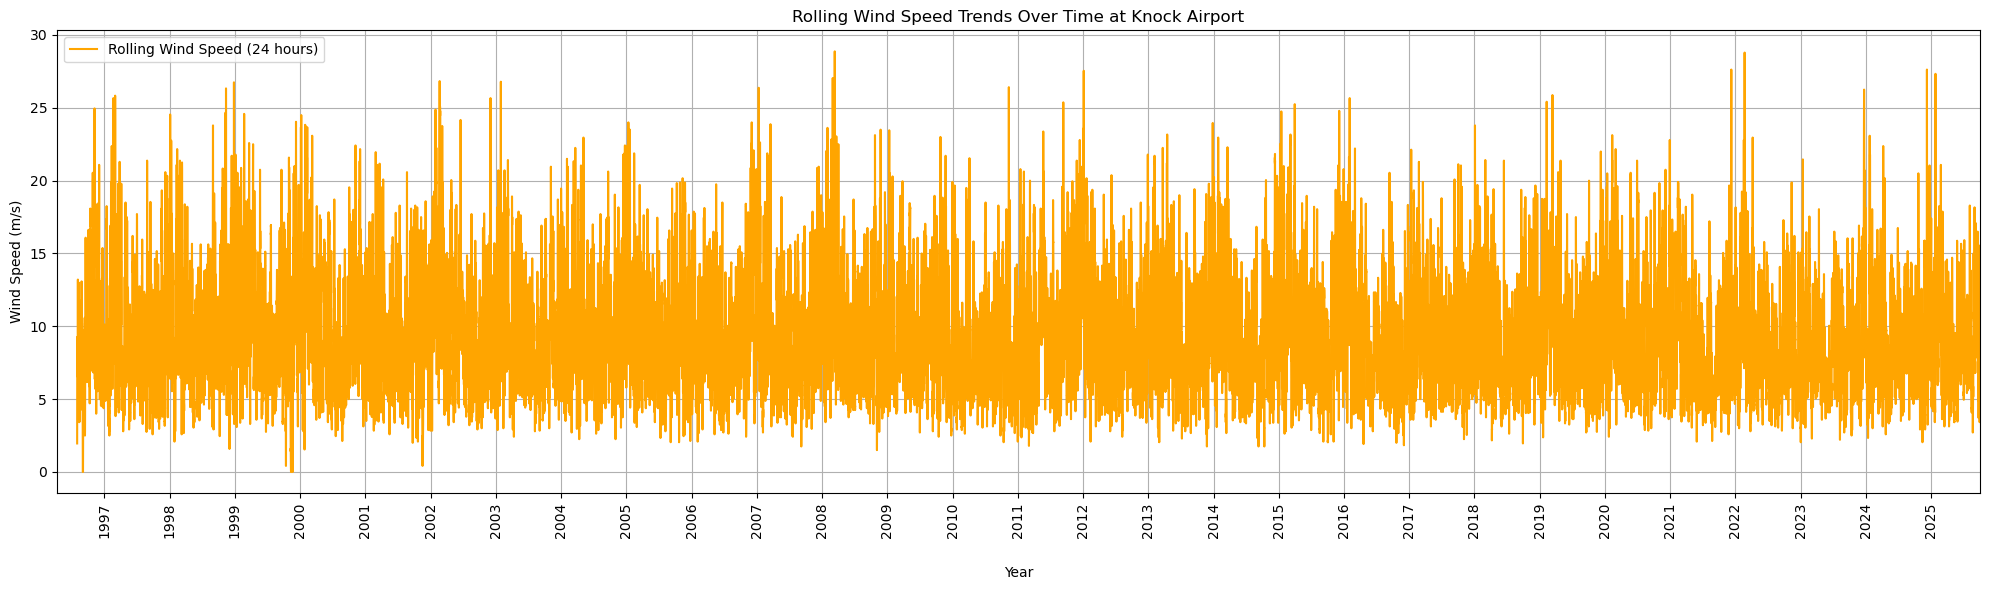

In [55]:
# Plotting the rolling wind speed (over 24 hours)
plt.figure(figsize=(20, 6))
# ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
plt.plot(df.index, df['wdsp'].rolling(24).mean(), color='orange', label='Rolling Wind Speed (24 hours)')
plt.title('Rolling Wind Speed Trends Over Time at Knock Airport')
plt.ylabel('Wind Speed (m/s)')
apply_common_plot_formatting(plt.gca())


In [56]:
# Daily max wind speeds
max_daily_wdsp = df.resample('D')['wdsp'].max()
max_daily_wdsp.head(3)

date
1996-04-10    0.0
1996-04-11    NaN
1996-04-12    NaN
Freq: D, Name: wdsp, dtype: float64

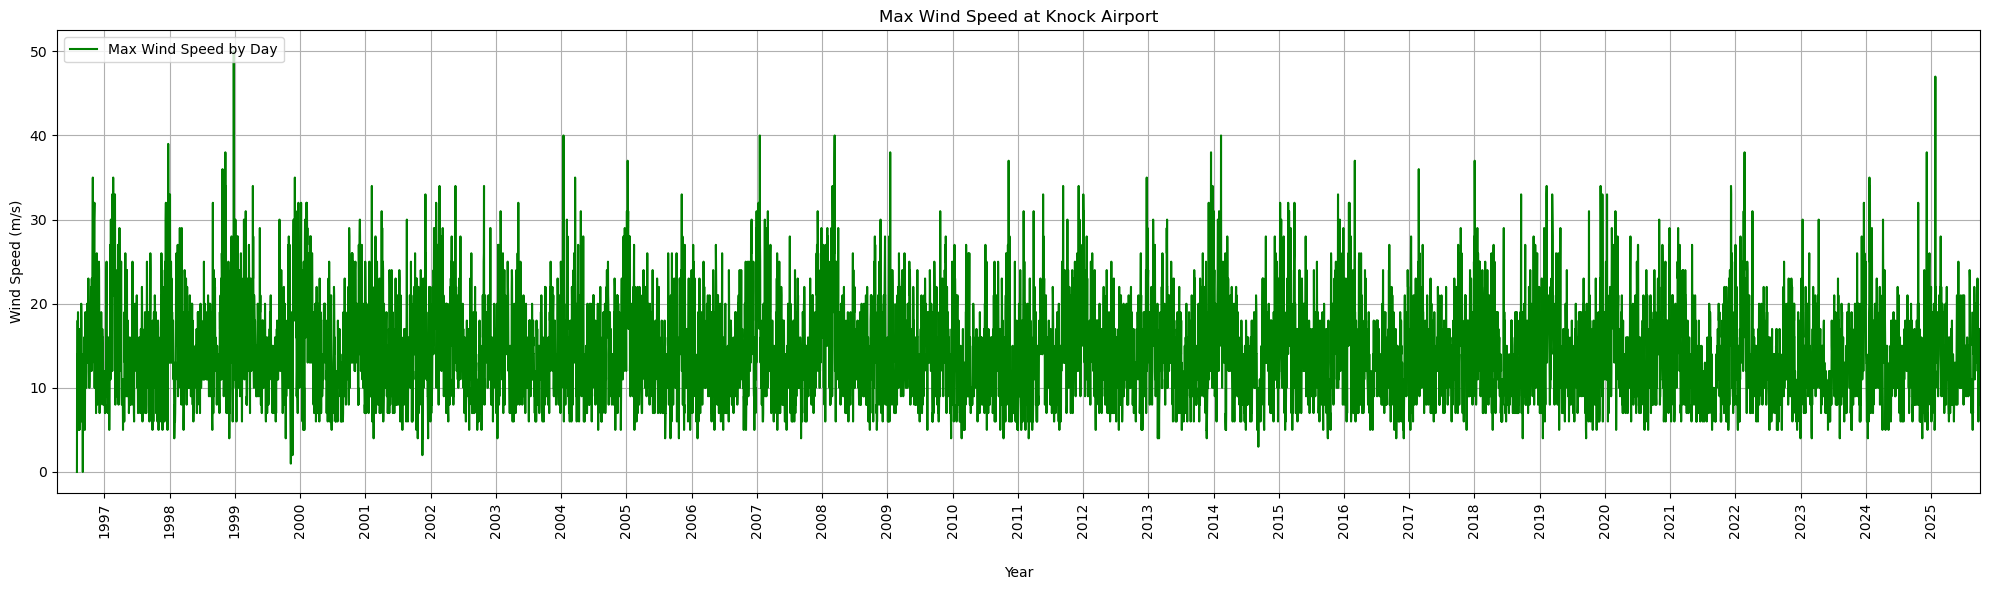

In [57]:
# Plotting the max wind speed for each day
plt.figure(figsize=(20, 6))
plt.plot(max_daily_wdsp.index, max_daily_wdsp, color='green', label='Max Wind Speed by Day')
plt.title('Max Wind Speed at Knock Airport')
plt.ylabel('Wind Speed (m/s)')
apply_common_plot_formatting(plt.gca())

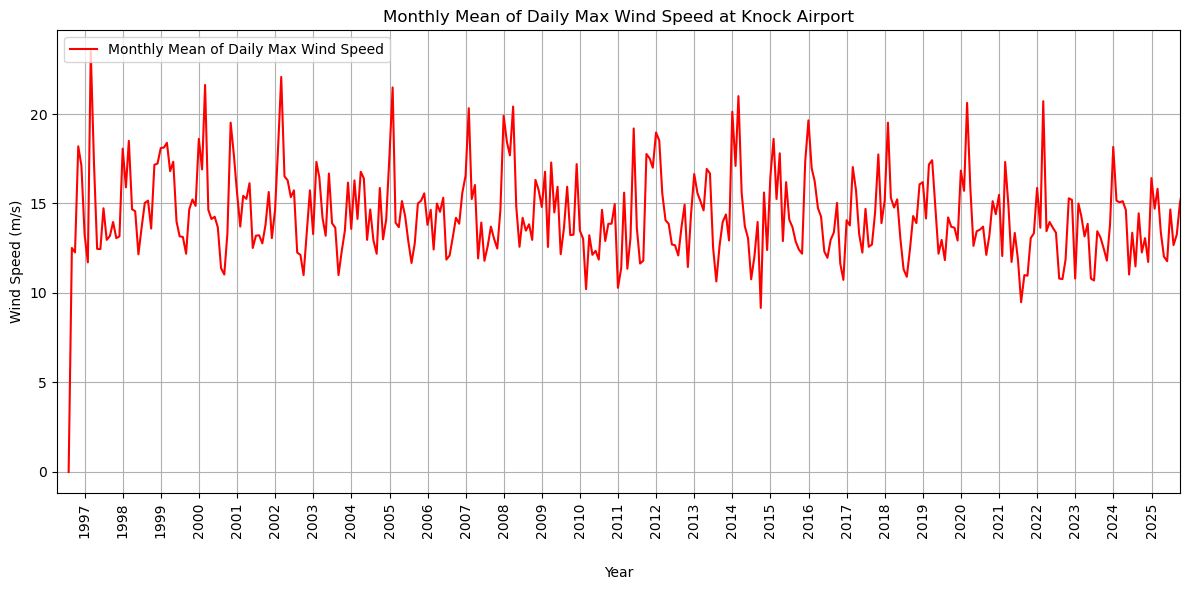

In [58]:
# Plotting the monthly mean of the daily max wind speeds
monthly_max_wdsp = max_daily_wdsp.resample('ME').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_max_wdsp.index, monthly_max_wdsp, color='red', label='Monthly Mean of Daily Max Wind Speed')
plt.title('Monthly Mean of Daily Max Wind Speed at Knock Airport')
plt.ylabel('Wind Speed (m/s)')
apply_common_plot_formatting(plt.gca())


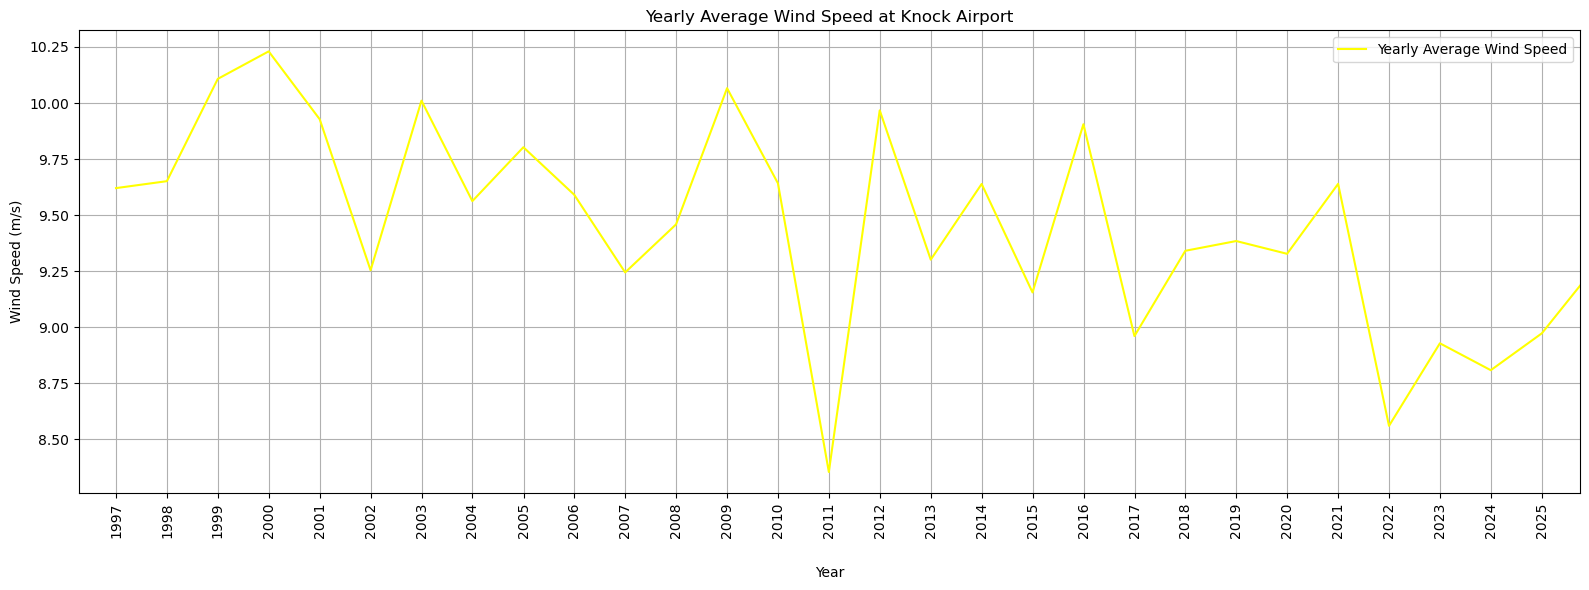

In [63]:
# Plotting the yearly average wind speed
plt.figure(figsize=(16, 6))
# Calculate yearly average wind speed
yearly_temp = df['wdsp'].resample('YE').mean()
plt.plot(yearly_temp.index,yearly_temp.values, color='yellow', label='Yearly Average Wind Speed')
plt.title('Yearly Average Wind Speed at Knock Airport')
plt.ylabel('Wind Speed (m/s)')
apply_common_plot_formatting(plt.gca(), legend_loc='upper right')